In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/MyDrive/Eye


/content/drive/MyDrive/Eye


In [4]:
import os
import cv2
import imghdr
import matplotlib.pyplot as plt
#Deep learning libs
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Flatten , Activation , Dense , Dropout , BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam , Adamax
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split


In [5]:
# !unzip Eye.zip

In [6]:
%cd Eye

/content/drive/MyDrive/Eye/Eye


In [7]:
data_dir='dataset'

In [8]:
#creating a list of filepaths and labels so that we can easy map them togehter
filepaths=[]
labels=[]
folders=os.listdir(data_dir)
for folder in folders:
   f_path = os.path.join(data_dir , folder)
   filelists = os.listdir(f_path)

   for file in filelists:
        filepaths.append(os.path.join(f_path , file))
        labels.append(folder)

In [9]:
filepaths[600]

'dataset/normal/NL_300.png'

In [10]:
import pandas as pd
#making test_df where a img name next to its detection
Fseries = pd.Series(filepaths , name = 'filepaths')
Lseries = pd.Series(labels , name = 'label')
data = pd.concat([Fseries , Lseries] , axis = 1)

In [11]:
data.tail()

,filepaths,label
596,dataset/normal/NL_296.png,normal
597,dataset/normal/NL_297.png,normal
598,dataset/normal/NL_299.png,normal
599,dataset/normal/NL_298.png,normal
600,dataset/normal/NL_300.png,normal


In [12]:
train_d,test_df= train_test_split(data , train_size = 0.2 , shuffle = True , random_state= 42)

In [13]:
valid , test = train_test_split(test_df , train_size = 0.5 , shuffle = True , random_state= 42)

In [14]:
img_size = (224 ,244)
batch_size = 45
tr_gen = ImageDataGenerator()
ts_gen= ImageDataGenerator()

train_gen = tr_gen.flow_from_dataframe(train_d , x_col = 'filepaths' , y_col = 'label' , target_size = img_size ,
                                      class_mode = 'categorical' , color_mode = 'rgb' , shuffle = True , batch_size =batch_size)

valid_gen = ts_gen.flow_from_dataframe(valid , x_col = 'filepaths' , y_col = 'label' , target_size = img_size ,
                                       class_mode = 'categorical',color_mode = 'rgb' , shuffle= True, batch_size = batch_size)

test_gen = ts_gen.flow_from_dataframe(test , x_col= 'filepaths' , y_col = 'label' , target_size = img_size ,
                                      class_mode = 'categorical' , color_mode= 'rgb' , shuffle = False , batch_size = batch_size)

Found 120 validated image filenames belonging to 4 classes.
Found 240 validated image filenames belonging to 4 classes.
Found 241 validated image filenames belonging to 4 classes.


In [15]:
#class_indices provide prediction label
gen_dict = train_gen.class_indices
classes = list(gen_dict.keys())

In [16]:
gen_dict

{'cataract': 0, 'glaucoma': 1, 'normal': 2, 'retina': 3}

In [17]:
#define image shape
img_shape = (img_size[0] , img_size[1] , 3)
#number of classess
num_class = len(classes)

base_model = tf.keras.applications.efficientnet.EfficientNetB3(include_top = False , weights = 'imagenet' ,
                                                               input_shape = img_shape, pooling= 'max')
model = Sequential([
    base_model,
    BatchNormalization(axis= -1 , momentum= 0.99 , epsilon= 0.001),
    Dense(256, kernel_regularizer = regularizers.l2(l= 0.016) , activity_regularizer = regularizers.l1(0.006),
         bias_regularizer= regularizers.l1(0.006) , activation = 'relu'),
    Dropout(rate= 0.4 , seed = 75),
    Dense(num_class , activation = 'softmax')
])

model.compile(Adamax(learning_rate = 0.001) , loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

43941136/43941136 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional  (None, 1536)              10783535  
 )                                                               
                                                                 
 batch_normalization (Batch  (None, 1536)              6144      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 256)               393472    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 1028      
                                                         

In [28]:
history=model.fit(train_gen,epochs=80,verbose = 1 , validation_data = valid_gen ,
                   validation_steps = None , shuffle = False)

Epoch 1/80
3/3 [==============================] - 41s 18s/step - loss: 5.1378 - accuracy: 1.0000 - val_loss: 6.7272 - val_accuracy: 0.4958
Epoch 2/80
3/3 [==============================] - 33s 14s/step - loss: 5.0417 - accuracy: 1.0000 - val_loss: 6.6287 - val_accuracy: 0.5000
Epoch 3/80
3/3 [==============================] - 32s 14s/step - loss: 4.9732 - accuracy: 1.0000 - val_loss: 6.5105 - val_accuracy: 0.5125
Epoch 4/80
3/3 [==============================] - 32s 14s/step - loss: 4.9119 - accuracy: 1.0000 - val_loss: 6.3737 - val_accuracy: 0.5167
Epoch 5/80
3/3 [==============================] - 34s 14s/step - loss: 4.8412 - accuracy: 1.0000 - val_loss: 6.2535 - val_accuracy: 0.5250
Epoch 6/80
3/3 [==============================] - 32s 14s/step - loss: 4.8195 - accuracy: 0.9917 - val_loss: 6.1971 - val_accuracy: 0.5208
Epoch 7/80
3/3 [==============================] - 34s 15s/step - loss: 4.7393 - accuracy: 1.0000 - val_loss: 6.1591 - val_accuracy: 0.5208
Epoch 8/80
3/3 [===========

KeyboardInterrupt: ignored

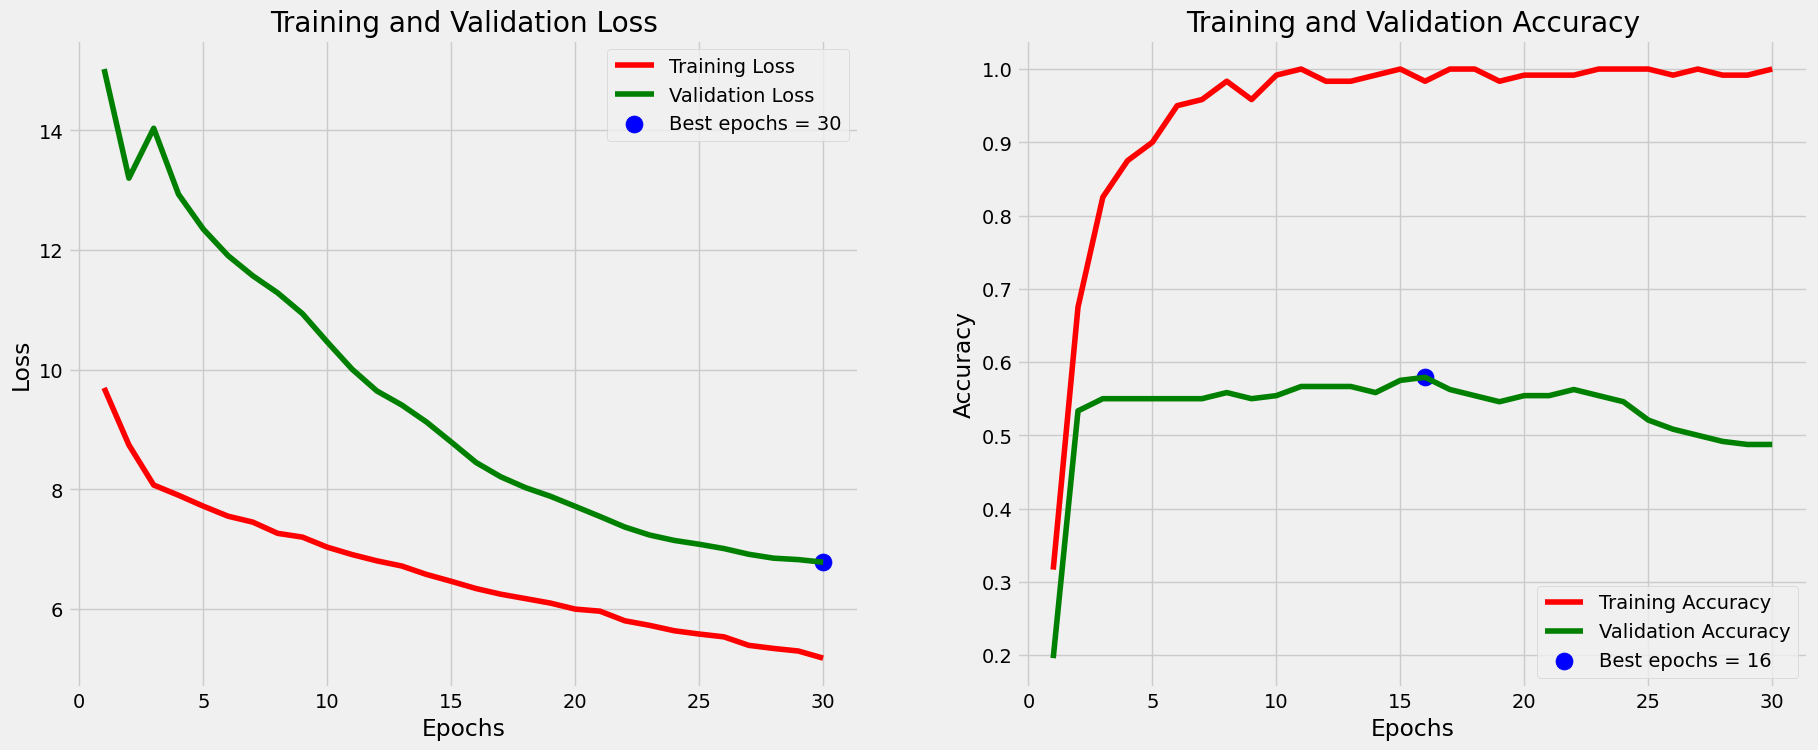

In [29]:
import numpy as np
train_acc = history.history['accuracy']
train_loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

index_acc = np.argmax(val_acc)
val_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(train_acc))]

loss_label = f'Best epochs = {str(index_loss +1)}'
acc_label = f'Best epochs = {str(index_acc + 1)}'

#Training history

plt.figure(figsize= (20,8))
plt.style.use('fivethirtyeight')

plt.subplot(1,2,1)
plt.plot(Epochs , train_loss , 'r' , label = 'Training Loss')
plt.plot(Epochs , val_loss , 'g' , label = 'Validation Loss')
plt.scatter(index_loss + 1 , val_lowest , s = 150 , c = 'blue',label = loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(Epochs , train_acc , 'r' , label = 'Training Accuracy')
plt.plot(Epochs , val_acc , 'g' , label = 'Validation Accuracy')
plt.scatter(index_acc + 1 , val_highest , s = 150 , c = 'blue',label = acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout
plt.show();

In [33]:
import numpy as np
preds = model.predict_generator(test_gen)

y_pred = np.argmax(preds , axis = 1)

<ipython-input-33-645f013499cd>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = model.predict_generator(test_gen)


In [21]:
from sklearn.metrics import classification_report
print(classification_report(test_gen.classes, y_pred , target_names= classes ))

              precision    recall  f1-score   support

    cataract       0.25      0.91      0.39        32
    glaucoma       0.63      0.32      0.42        38
      normal       0.74      0.60      0.66       131
      retina       1.00      0.03      0.05        40

    accuracy                           0.50       241
   macro avg       0.65      0.46      0.38       241
weighted avg       0.70      0.50      0.48       241



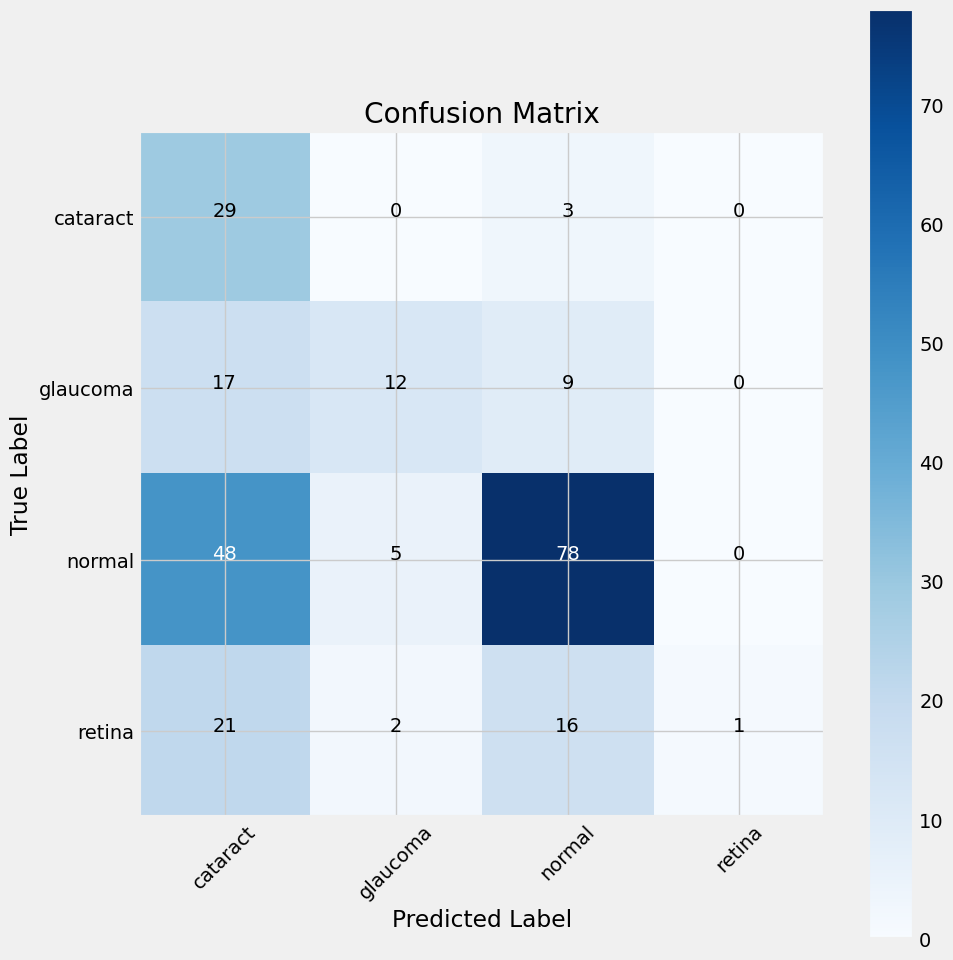

In [32]:
# Confusion matix
from sklearn.metrics import confusion_matrix
import itertools
cm = confusion_matrix(test_gen.classes, y_pred)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [31]:
save_dir = 'Save_Model'

# Save the model in different formats
tf.saved_model.save(model, save_dir)

In [27]:
g

NameError: ignored

In [ ]:
#!2

In [ ]:
2

In [ ]:
#132

In [ ]:
#23423